In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools

In [74]:
bathy = nc.Dataset('../../nemo-forcing/grid/bathy_meter_SalishSea2.nc', 'r')
print bathy.file_format
print bathy.variables.keys

NETCDF4
<bound method OrderedDict.keys of OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7effb20a1770>), (u'nav_lat', <netCDF4.Variable object at 0x7effb20a1348>), (u'Bathymetry', <netCDF4.Variable object at 0x7effb20a1a68>)])>


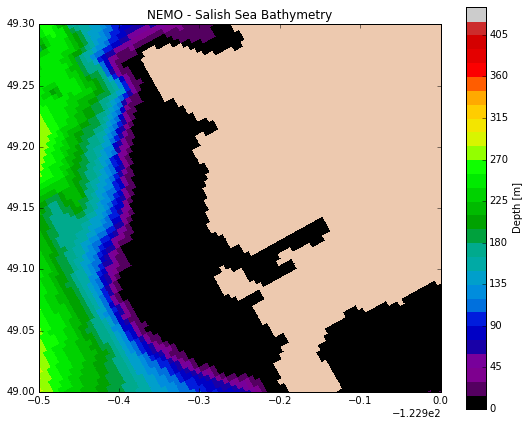

In [75]:
fig = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry', 
    axis_limits=(-123.4, -122.9, 49., 49.3), colour_map='spectral', bins=30)

In [76]:
lon = bathy.variables['nav_lon']
lat = bathy.variables['nav_lat']
depth = bathy.variables['Bathymetry'][:]
print depth.shape

(898, 398)


6.0


<matplotlib.colorbar.Colorbar instance at 0x7effa76075a8>

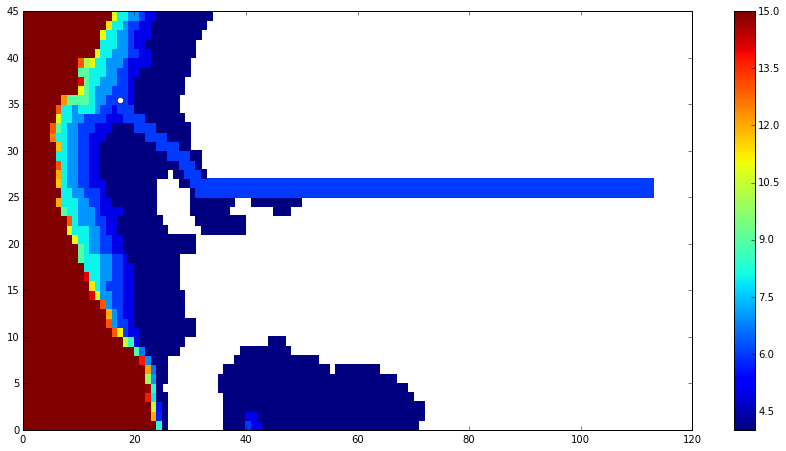

In [81]:
ik = 425; jk = 302; d = 6
print depth[ik,jk]
depth[ik,jk+1] = d
depth[ik-1,jk:jk+3] = d
depth[ik-2,jk+1:jk+5] = d
depth[ik-3,jk+3:jk+7] = d
depth[ik-4,jk+5:jk+9] = d
depth[ik-5,jk+7:jk+11] = d
depth[ik-6,jk+9:jk+13] = d
depth[ik-7,jk+11:jk+14] = d
depth[ik-8,jk+12:jk+15] = d
depth[ik-9,jk+13:] = d
depth[ik-10,jk+14:] = d

fig, ax = plt.subplots(1,1,figsize=(15,7.5))
imin = 390; imax = 435; jmin = 285; jmax = 398
mesh = ax.pcolormesh(depth[imin:imax,jmin:jmax], vmax = 15)
ax.plot(jk-jmin+0.5,ik-imin+0.5,'wo')
fig.colorbar(mesh)

In [82]:
ysize = depth.shape[0]; xsize = depth.shape[1]
print ysize, xsize

new_bathy = nc.Dataset('bathy_with_Fraser.nc', 'w')
new_bathy.createDimension('y', ysize)
new_bathy.createDimension('x', xsize)
nc_tools.show_dimensions(new_bathy)

898 398
<type 'netCDF4.Dimension'>: name = 'y', size = 898

<type 'netCDF4.Dimension'>: name = 'x', size = 398



In [83]:
newlons = new_bathy.createVariable('nav_lon', float, ('y', 'x'), zlib=True)
newlons.setncattr('units', 'degrees_east')
newlats = new_bathy.createVariable('nav_lat', float, ('y', 'x'), zlib=True)
newlats.setncattr('units', 'degrees_north')
newdepths = new_bathy.createVariable(
    'Bathymetry', float, ('y', 'x'), 
    zlib=True, least_significant_digit=1, fill_value=0)
newdepths.setncattr('units', 'metres')

newlons[:] = bathy.variables['nav_lon']
newlats[:] = bathy.variables['nav_lat']
newdepths[:] = depth[:]

In [84]:
nc_tools.show_dataset_attrs(new_bathy)

file format: NETCDF4


In [85]:
new_bathy.history = """
[2013-10-30 13:18] Created netCDF4 zlib=True dataset.
[2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
[2013-10-31 17:10] Algorithmic smoothing.
[2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
[2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
[2013-11-21 20:47] Removed east end of Jervis Inlet and Toba Inlet region due to deficient source bathymetry data in Cascadia dataset.
[2013-11-21 21:52] Algorithmic smoothing.
[2014-01-01 14:44] Smoothed mouth of Juan de Fuca
[2015-05-20 16:15] Blasted out a 6 m deep, 1km wide, 40 km long, Fraser River
"""

In [86]:
new_bathy.conventions = """
CF-1.6"""

new_bathy.title= """
Salish Sea NEMO Bathymetry"""

new_bathy.institution= """ 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""

new_bathy.references= """ 
https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_with_Fraser.nc"""

new_bathy.comment= """
Based on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oct-2013 WCSD_PREP tarball provided by J-P Paquin.
"""

new_bathy.source= """ 
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SmoothMouthJdF.ipynb
https://bitbucket.org/salishsea/tools/src/tip/bathymetry/blast a river.ipynb
"""

new_bathy.close()